In [1]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import scipy.stats as stats # 统计模块
import scipy
# import pymysql  # 导入数据库模块

from datetime import datetime # 时间模块
import statsmodels.formula.api as smf  # OLS regression

# import pyreadr # read RDS file

from matplotlib import style
import matplotlib.pyplot as plt  # 画图模块
import matplotlib.dates as mdates

from matplotlib.font_manager import FontProperties # 作图中文
from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['font.family'] = 'Times New Roman'

#输出矢量图 渲染矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('D:/c-j-l-j-l-cc-1/datasets/000001xin.csv')
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data.sort_values(by = ['Day'],axis=0, ascending=True)

,Preclose,Open,Highest,Lowest,Close,Volume,Money
Day,,,,,,,
1990-12-19,,96.050,99.980,95.790,99.980,126000.00,4.940000e+05
1990-12-20,99.98,104.300,104.390,99.980,104.390,19700.00,8.400000e+04
1990-12-21,104.39,109.070,109.130,103.730,109.130,2800.00,1.600000e+04
1990-12-24,109.13,113.570,114.550,109.130,114.550,3200.00,3.100000e+04
1990-12-25,114.55,120.090,120.250,114.550,120.250,1500.00,6.000000e+03
...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07


In [4]:
data_new = data['1995-01':'2024-09'].copy()
data_new['Close'] = pd.to_numeric(data_new['Close'])
data_new['Preclose'] = pd.to_numeric(data_new['Preclose'])
data_new['Raw_return'] = data_new['Close'] / data_new['Preclose'] - 1
data_new

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Raw_return
Day,,,,,,,,
1995-01-03,647.870,637.720,647.710,630.530,639.880,23451800.00,1.806930e+08,-0.012333
1995-01-04,639.880,641.900,655.510,638.860,653.810,42222000.00,3.069230e+08,0.021770
1995-01-05,653.810,655.380,657.520,645.810,646.890,43012300.00,3.015330e+08,-0.010584
1995-01-06,646.890,642.750,643.890,636.330,640.760,48748200.00,3.537580e+08,-0.009476
1995-01-09,640.760,637.520,637.550,625.040,626.000,50985100.00,3.985190e+08,-0.023035
...,...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07,0.041547
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07,0.011589
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07,0.036131


In [5]:
Month_data = data_new.resample('M')['Raw_return'].apply(lambda x: (1+x).prod() - 1).to_frame()
Month_data.reset_index(inplace = True)
Month_data.rename(columns = {'Day':'month'}, inplace = True)
Month_data.set_index('month', inplace = True)
Month_data

,Raw_return
month,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


In [6]:
Quarter_data = data_new.resample('Q')['Raw_return'].apply(lambda x: (1+x).prod() - 1).to_frame()
Quarter_data.reset_index(inplace = True)
Quarter_data.rename(columns = {'Day':'Q'}, inplace = True)
Quarter_data.set_index('Q', inplace = True)
Quarter_data

,Raw_return
Q,
1995-03-31,-0.001466
1995-06-30,-0.025258
1995-09-30,0.145660
1995-12-31,-0.231358
1996-03-31,0.001981
...,...
2023-09-30,-0.028603
2023-12-31,-0.043575
2024-03-31,0.022263


In [7]:
Year_data = data_new.resample('Y')['Raw_return'].apply(lambda x: (1+x).prod() - 1).to_frame()
Year_data.reset_index(inplace = True)
Year_data.rename(columns = {'Day':'Year'}, inplace = True)
Year_data.set_index('Year', inplace = True)
Year_data

,Raw_return
Year,
1995-12-31,-0.142899
1996-12-31,0.651425
1997-12-31,0.302153
1998-12-31,-0.039695
1999-12-31,0.191750
2000-12-31,0.517277
2001-12-31,-0.206180
2002-12-31,-0.175167
2003-12-31,0.102670


In [8]:
inflation = pd.read_csv('D:/c-j-l-j-l-cc-1/datasets/inflation.csv')
inflation['month'] = pd.to_datetime(inflation['month'],format='%Y/%m/%d')
inflation.set_index('month',inplace=True)
inflation.sort_values(by=['month'],axis=0,ascending=True)

,cpi
month,
1987-01-31,5.1
1987-02-28,5.4
1987-03-31,5.8
1987-04-30,6.7
1987-05-31,7.6
...,...
2023-03-31,0.7
2023-04-30,0.1
2023-05-31,0.2


In [9]:
market_variance = data_new.resample('M').apply({
    'Raw_return':
    lambda x: sum(x**2)
})
market_variance.reset_index(inplace=True)
market_variance.rename(columns={'Day':'month','Raw_return':'RV'},inplace=True)
market_variance.set_index('month',inplace=True)
market_variance

# market_variance <- daily_data[,.(MV = sum(Raw_return^2)),by = 'month'] This is R code

,RV
month,
1995-01-31,0.005695
1995-02-28,0.018086
1995-03-31,0.013378
1995-04-30,0.008281
1995-05-31,0.148387
...,...
2024-05-31,0.000915
2024-06-30,0.000642
2024-07-31,0.001441


In [13]:
cross = pd.read_csv('D:/c-j-l-j-l-cc-1/datasets/cross_section.csv')
from pandas.tseries.offsets import MonthEnd
cross['month'] = pd.to_datetime(cross['month']) + MonthEnd(1)
cross['to_v'] = pd.to_numeric(cross['to_v'])
cross['floatingvalue'] = pd.to_numeric(cross['floatingvalue'])
cross = cross.dropna(subset=['to_v','floatingvalue'])
cross = cross.dropna()
# 补齐股票代码 如果不满6位 在前面补上0
cross['Stkcd'] = cross['Stkcd'].apply(lambda x: '{:0>6}'.format(x)) # 6位股票代码
cross['w'] = 1
cross

,Unnamed: 0,Stkcd,month,Rank,Freq,floatingvalue,totalvalue,sizef,sizet,Return,rfmonth,ret,next_ret,next_ret2,next_ret3,next_ret4,next_ret5,next_ret6,next_ret7,next_ret8,next_ret9,next_ret10,next_ret11,next_ret12,beta_6m,N6m,beta_12m,N12m,beta_1y,N1y,beta_5y,N5y,to_v,to_m,w
2,3,000001,1991-06-30,3,23.0,9.007350e+08,1.648521e+09,20.618722,21.223144,-0.113459,0.006092,-0.119551,-0.137013,-0.417680,-0.039425,0.849080,0.016213,0.061181,0.055237,0.006749,0.239957,0.471835,0.167934,-0.076888,0.246808,67.0,0.246808,67.0,-1.821836,2.0,-1.821836,2.0,0.001155,0.001154,1
3,4,000001,1991-07-31,4,16.0,7.828100e+08,1.432695e+09,20.478401,21.082823,-0.130921,0.006092,-0.137013,-0.417680,-0.039425,0.849080,0.016213,0.061181,0.055237,0.006749,0.239957,0.471835,0.167934,-0.076888,0.079622,0.165424,83.0,0.165424,83.0,0.807037,3.0,0.807037,3.0,0.000230,0.000231,1
4,5,000001,1991-08-31,5,15.0,6.748338e+08,1.346275e+09,20.329977,21.020607,-0.411588,0.006092,-0.417680,-0.039425,0.849080,0.016213,0.061181,0.055237,0.006749,0.239957,0.471835,0.167934,-0.076888,0.079622,-0.101487,1.506699,98.0,1.506699,98.0,23.378197,4.0,23.378197,4.0,0.072087,0.071757,1
5,6,000001,1991-09-30,6,24.0,6.523394e+08,1.301399e+09,20.296075,20.986706,-0.033333,0.006092,-0.039425,0.849080,0.016213,0.061181,0.055237,0.006749,0.239957,0.471835,0.167934,-0.076888,0.079622,-0.101487,0.075120,1.502630,122.0,1.502630,122.0,3.358613,5.0,3.358613,5.0,0.160940,0.159767,1
6,7,000001,1991-10-31,7,25.0,1.210202e+09,2.414319e+09,20.914053,21.604683,0.855172,0.006092,0.849080,0.016213,0.061181,0.055237,0.006749,0.239957,0.471835,0.167934,-0.076888,0.079622,-0.101487,0.075120,-0.110352,1.442916,127.0,1.439716,147.0,1.259122,6.0,1.259122,6.0,0.235418,0.233129,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695702,695703,605589,2021-12-31,5,23.0,3.104598e+09,2.967395e+10,21.856150,24.113535,-0.027672,0.001241,-0.028913,-0.162860,-0.022107,-0.082348,-0.232809,0.031642,0.074642,-0.005295,-0.219681,-0.131562,0.004801,0.475636,-0.131375,2.010526,96.0,2.010526,96.0,9.965810,4.0,9.965810,4.0,1.242434,1.244132,1
695717,695718,605598,2021-11-30,3,22.0,6.332162e+08,2.532419e+09,20.266323,21.652441,0.077941,0.001241,0.076700,0.085389,-0.079082,0.100869,-0.084008,0.447244,-0.075625,-0.094159,-0.010100,-0.051188,0.442483,-0.114302,0.214590,1.053620,45.0,1.053620,45.0,8.102102,2.0,8.102102,2.0,1.263335,1.259508,1
695718,695719,605598,2021-12-31,4,23.0,6.880719e+08,2.751803e+09,20.349404,21.735522,0.086630,0.001241,0.085389,-0.079082,0.100869,-0.084008,0.447244,-0.075625,-0.094159,-0.010100,-0.051188,0.442483,-0.114302,0.214590,-0.058773,0.524152,68.0,0.524152,68.0,8.368754,3.0,8.368754,3.0,3.586361,3.586503,1
695733,695734,605599,2021-11-30,3,22.0,9.636669e+08,9.636667e+09,20.686256,22.988841,0.061697,0.001241,0.060456,0.085119,-0.117883,0.104730,-0.171583,-0.053487,0.037444,0.044385,-0.003998,-0.061149,-0.090457,-0.028152,0.049644,1.018228,51.0,1.018228,51.0,6.697228,2.0,6.697228,2.0,0.924082,0.921374,1


In [15]:
turnover = pd.DataFrame(cross.groupby(['month']).apply(
    lambda x:
    np.average(x['to_v'],weights=x['w']) ))
turnover = turnover.rename(columns={0:'to'})
turnover

,to
month,
1991-02-28,0.050337
1991-03-31,0.088436
1991-04-30,0.076774
1991-05-31,0.113279
1991-06-30,0.082204
...,...
2021-08-31,0.701120
2021-09-30,0.623581
2021-10-31,0.386620


In [16]:
turnover = pd.DataFrame(cross.groupby(['month']).apply(
    lambda x:
    np.average(x['to_v'],weights=x['floatingvalue']) ))
turnover = turnover.rename(columns={0:'to'})
turnover

,to
month,
1991-02-28,0.042654
1991-03-31,0.014105
1991-04-30,0.026301
1991-05-31,0.056657
1991-06-30,0.028056
...,...
2021-08-31,0.415555
2021-09-30,0.364165
2021-10-31,0.224429


In [17]:
reg_data = pd.merge(Month_data,market_variance,on = 'month')
reg_data = pd.merge(reg_data,inflation,on = 'month')
reg_data = pd.merge(reg_data,turnover,on='month')
reg_data = reg_data['2000':]
reg_data

,Raw_return,RV,cpi,to
month,,,,
2000-01-31,0.123242,0.008258,-0.2,0.472480
2000-02-29,0.116990,0.013547,0.7,0.604305
2000-03-31,0.049948,0.007877,-0.2,0.764552
2000-04-30,0.020053,0.002494,-0.3,0.479259
2000-05-31,0.031710,0.003515,0.1,0.343018
...,...,...,...,...
2021-08-31,0.043145,0.001956,0.8,0.415555
2021-09-30,0.006837,0.001526,0.7,0.364165
2021-10-31,-0.005838,0.000690,1.5,0.224429


In [18]:
reg_data['to'].describe().round(5)

count    264.00000
mean       0.29436
std        0.17315
min        0.06931
25%        0.17924
50%        0.23947
75%        0.36425
max        1.10994
Name: to, dtype: float64

In [19]:
reg_data['to'].skew()
reg_data['to'].kurt()

1.7352074844795262

3.6606986942307134

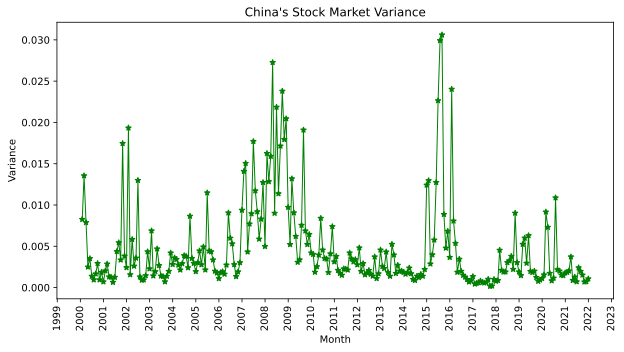

In [44]:
fig = plt.figure(figsize=(10, 5)) # 图片比例
ax = fig.add_subplot(1, 1, 1)  # 定义ax
ax.plot(
    'RV',  # 要画图的变量名
    '*-g',  # 线的类型
    linewidth = 1,  # 线的粗细
    data = reg_data['2000-01-01':'2023-12-31'])  # 画图的数据
plt.title("China's Stock Market Variance") # 画图的标题
plt.xlabel('Month') # 画图的x轴名称
plt.ylabel('Variance') # 画图的y轴名称

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())

# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

fig.savefig('Variance.pdf', bbox_inches='tight')
plt.show();

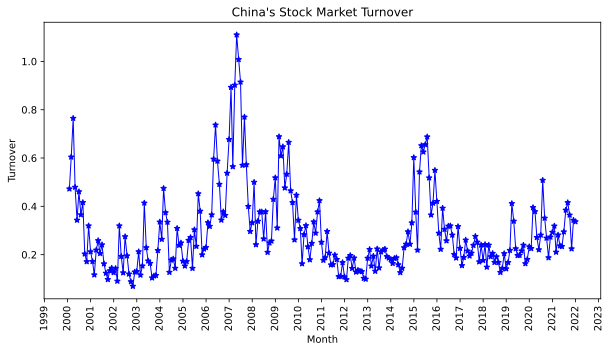

In [43]:
fig = plt.figure(figsize=(10, 5)) # 图片比例
ax = fig.add_subplot(1, 1, 1)  # 定义ax
ax.plot(
    'to',  # 要画图的变量名
    '*-b',  # 线的类型
    linewidth = 1,  # 线的粗细
    data = reg_data['2000-01-01':'2022-12-31'])  # 画图的数据
plt.title("China's Stock Market Turnover") # 画图的标题
plt.xlabel('Month') # 画图的x轴名称
plt.ylabel('Turnover') # 画图的y轴名称

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())

# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

fig.savefig('Turnover.pdf', bbox_inches='tight')
plt.show();

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


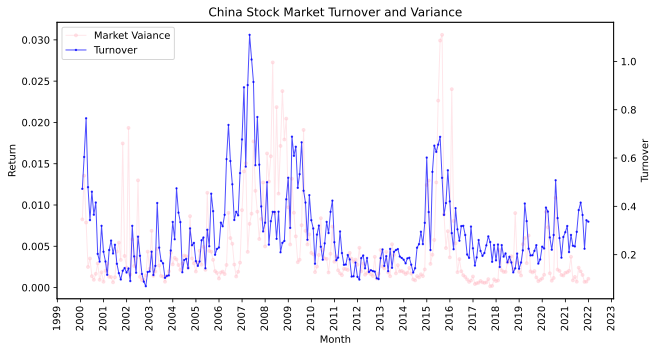

In [42]:
# Change the figure style
# list the figure style
print(plt.style.available)
#plt.style.use('ggplot')
# 使用默认的画图风格
plt.style.use('default')

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(reg_data['RV'],
         color='pink',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='Market Vaiance')
ax1.set_xlabel('Month')  # 设置横坐标标签
ax1.set_ylabel('Return')  # 设置左边纵坐标标签
#ax1.legend(loc=2)  # 设置图例在左上方
ax1.set_title("China Stock Market Turnover and Variance")  # 给整张图命名

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())
# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

ax2 = ax1.twinx()  #twinx()函数表示共享x轴
ax2.plot(reg_data['to'],
         color='blue',
         marker='*',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='Turnover')
ax2.set_ylabel('Turnover')  # 设置右边纵坐标标签
#ax2.legend(loc=1)  # 设置图例在右上方

# change the legend into one box
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

fig = plt.gcf()
fig.savefig('mvto.pdf', bbox_inches='tight')
plt.show();

In [23]:
reg_data['lRV'] = reg_data['RV'].shift(1)
model_fore_mv = smf.ols('RV ~ lRV',
                 data=reg_data['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_fore_mv.summary())

                            OLS Regression Results                            
Dep. Variable:                     RV   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     51.04
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           9.03e-12
Time:                        18:26:18   Log-Likelihood:                 1063.2
No. Observations:                 263   AIC:                            -2122.
Df Residuals:                     261   BIC:                            -2115.
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0018      0.000      4.819      0.0

In [24]:
reg_data['lto'] = reg_data['to'].shift(1)
model_fore_mv = smf.ols('RV ~ lto',
                 data=reg_data['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_fore_mv.summary())

                            OLS Regression Results                            
Dep. Variable:                     RV   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     18.51
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           2.40e-05
Time:                        18:26:54   Log-Likelihood:                 1029.3
No. Observations:                 263   AIC:                            -2055.
Df Residuals:                     261   BIC:                            -2047.
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0009      0.001      1.017      0.3

In [26]:
reg_data['lRV'] = reg_data['RV'].shift(1)
model_fore_mv = smf.ols('RV ~ lto + lRV',
                 data=reg_data['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_fore_mv.summary())

                            OLS Regression Results                            
Dep. Variable:                     RV   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     30.64
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           1.13e-12
Time:                        18:27:16   Log-Likelihood:                 1069.2
No. Observations:                 263   AIC:                            -2132.
Df Residuals:                     260   BIC:                            -2122.
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0005      0.001      0.986      0.3

In [27]:
reg_data['fitted_mv'] = model_fore_mv.fittedvalues
reg_data

,Raw_return,RV,cpi,to,lRV,lto,fitted_mv
month,,,,,,,
2000-01-31,0.123242,0.008258,-0.2,0.472480,NaN,NaN,NaN
2000-02-29,0.116990,0.013547,0.7,0.604305,0.008258,0.472480,0.007546
2000-03-31,0.049948,0.007877,-0.2,0.764552,0.013547,0.604305,0.011054
2000-04-30,0.020053,0.002494,-0.3,0.479259,0.007877,0.764552,0.009039
2000-05-31,0.031710,0.003515,0.1,0.343018,0.002494,0.479259,0.004594
...,...,...,...,...,...,...,...
2021-08-31,0.043145,0.001956,0.8,0.415555,0.002401,0.384462,0.003998
2021-09-30,0.006837,0.001526,0.7,0.364165,0.001956,0.415555,0.003947
2021-10-31,-0.005838,0.000690,1.5,0.224429,0.001526,0.364165,0.003426


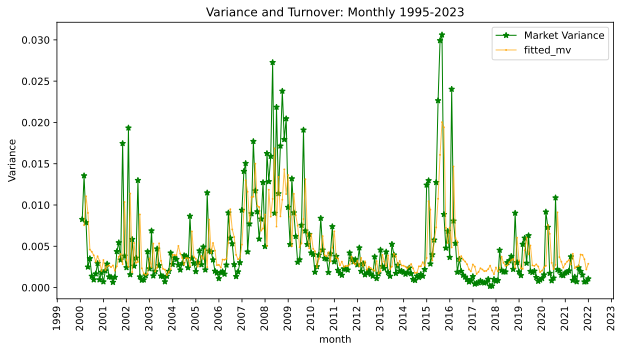

In [40]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(reg_data['RV'],
         color='green',
         marker='*',
         linestyle='-',
         linewidth=1,
         label='Market Variance')
plt.xlabel('month')  # 设置横坐标标签
plt.ylabel('Variance')  # 设置左边纵坐标标签
#plt.legend(loc=2)  # 设置图例在左上方
plt.title("Variance and Turnover: Monthly 1995-2023")  # 给整张图命名

ax1.plot(reg_data['fitted_mv'],
         color='orange',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='fitted_mv')
# ax2.set_ylabel('fitted_mv')  # 设置右边纵坐标标签
# ax2.legend(loc=1)  # 设置图例在右上方

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

plt.legend(loc='upper right')

fig.savefig('MV_fitted.pdf', bbox_inches='tight')
plt.show();

In [29]:
model_fore_ret = smf.ols('Raw_return ~ fitted_mv',
                 data=reg_data['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_fore_ret.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1308
Date:                Thu, 19 Dec 2024   Prob (F-statistic):              0.718
Time:                        18:28:09   Log-Likelihood:                 317.36
No. Observations:                 263   AIC:                            -630.7
Df Residuals:                     261   BIC:                            -623.6
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0098      0.009      1.033      0.3

In [30]:
reg_data['lto'] = reg_data['to'].shift(1)
model_to = smf.ols('Raw_return ~ lto',
                 data=reg_data['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_to.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     4.484
Date:                Thu, 19 Dec 2024   Prob (F-statistic):             0.0352
Time:                        18:28:26   Log-Likelihood:                 320.72
No. Observations:                 263   AIC:                            -637.4
Df Residuals:                     261   BIC:                            -630.3
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0141      0.008     -1.675      0.0

In [31]:
reg_data

,Raw_return,RV,cpi,to,lRV,lto,fitted_mv
month,,,,,,,
2000-01-31,0.123242,0.008258,-0.2,0.472480,NaN,NaN,NaN
2000-02-29,0.116990,0.013547,0.7,0.604305,0.008258,0.472480,0.007546
2000-03-31,0.049948,0.007877,-0.2,0.764552,0.013547,0.604305,0.011054
2000-04-30,0.020053,0.002494,-0.3,0.479259,0.007877,0.764552,0.009039
2000-05-31,0.031710,0.003515,0.1,0.343018,0.002494,0.479259,0.004594
...,...,...,...,...,...,...,...
2021-08-31,0.043145,0.001956,0.8,0.415555,0.002401,0.384462,0.003998
2021-09-30,0.006837,0.001526,0.7,0.364165,0.001956,0.415555,0.003947
2021-10-31,-0.005838,0.000690,1.5,0.224429,0.001526,0.364165,0.003426


In [32]:
Qreg_data = reg_data.resample('Q').apply({
    'Raw_return':
    lambda x: np.prod(1+x) - 1,
    'to':
    lambda x: sum(x),
    'cpi':
    lambda x: sum(x)
})
Qreg_data

,Raw_return,to,cpi
month,,,
2000-03-31,0.317318,1.841336,0.3
2000-06-30,0.071041,1.282962,0.3
2000-09-30,-0.009310,0.984307,0.8
2000-12-31,0.085501,0.702648,2.8
2001-03-31,0.018954,0.507447,2.0
...,...,...,...
2020-12-31,0.079247,0.753601,0.2
2021-03-31,-0.008972,0.810980,-0.1
2021-06-30,0.043374,0.765386,3.3


In [33]:
Qreg_data['lto'] = Qreg_data['to'].shift(1)
Qreg_data['lcpi'] = Qreg_data['cpi'].shift(1)
model_to = smf.ols('Raw_return ~ lto + lcpi',
                 data=Qreg_data['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
print(model_to.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     4.896
Date:                Thu, 19 Dec 2024   Prob (F-statistic):            0.00974
Time:                        18:29:16   Log-Likelihood:                 51.092
No. Observations:                  87   AIC:                            -96.18
Df Residuals:                      84   BIC:                            -88.79
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0108      0.039     -0.277      0.7

In [34]:
from statsmodels.iolib.summary2 import summary_col

info_dict = {'No. observations': lambda x: f"{int(x.nobs):d}"}

model_to = smf.ols('Raw_return ~ lto',
                 data=Qreg_data['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpi = smf.ols('Raw_return ~ lcpi',
                 data=Qreg_data['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpito = smf.ols('Raw_return ~ lto + lcpi',
                 data=Qreg_data['2000-01':'2023-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})

results_table = summary_col(results=[model_to, model_cpi, model_cpito],
                            float_format='%0.3f', #数据显示的格式，默认四位小数
                            stars=True, # 是否有*，True为有
                            model_names=['Quarter Turnover', 'Quarter Inflation', 'Quarter CPI & Inflation'],
                            info_dict=info_dict,
                            regressor_order=['Intercept', 'lto','lcpi'])

results_table.add_title(
    'Table - OLS Regressions: Forecast Quarterly Stock Market Return')

print(results_table)

      Table - OLS Regressions: Forecast Quarterly Stock Market Return
                 Quarter Turnover Quarter Inflation Quarter CPI & Inflation
---------------------------------------------------------------------------
Intercept        -0.058*          0.065***          -0.011                 
                 (0.031)          (0.025)           (0.039)                
lto              0.086**                            0.085**                
                 (0.038)                            (0.043)                
lcpi                              -0.007***         -0.007**               
                                  (0.003)           (0.003)                
R-squared        0.080            0.078             0.156                  
R-squared Adj.   0.069            0.067             0.136                  
No. observations 87               87                87                     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01
